In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.enable_eager_execution()

In [0]:
tfe = tf.contrib.eager

In [0]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

learning_rate = 0.01
display_step = 100
num_steps = 1000

In [0]:
W = tfe.Variable(np.random.random())
b = tfe.Variable(np.random.random())

def linear_func(inputs):
    return inputs * W + b

def mean_sqrt(model, inputs, labels):
    return tf.reduce_sum(tf.pow(model(inputs) -  labels, 2) / (2 * n_samples))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
grad = tfe.implicit_gradients(mean_sqrt)

C= tf.Tensor(0.4286263, shape=(), dtype=float32) W= 0.44770858 B= 0.2793487
1 C= tf.Tensor(0.19510852, shape=(), dtype=float32) W= 0.3932396 B= 0.2723298
100 C= tf.Tensor(0.09089973, shape=(), dtype=float32) W= 0.31864676 B= 0.3237175
200 C= tf.Tensor(0.08788674, shape=(), dtype=float32) W= 0.31098258 B= 0.37805304
300 C= tf.Tensor(0.08552358, shape=(), dtype=float32) W= 0.30419496 B= 0.42617428
400 C= tf.Tensor(0.08367001, shape=(), dtype=float32) W= 0.29818362 B= 0.46879196
500 C= tf.Tensor(0.0822162, shape=(), dtype=float32) W= 0.29285982 B= 0.50653535
600 C= tf.Tensor(0.08107593, shape=(), dtype=float32) W= 0.2881449 B= 0.53996205
700 C= tf.Tensor(0.080181554, shape=(), dtype=float32) W= 0.28396916 B= 0.569566
800 C= tf.Tensor(0.07948007, shape=(), dtype=float32) W= 0.28027108 B= 0.5957837
900 C= tf.Tensor(0.07892987, shape=(), dtype=float32) W= 0.276996 B= 0.61900276
1000 C= tf.Tensor(0.07849835, shape=(), dtype=float32) W= 0.27409548 B= 0.63956624


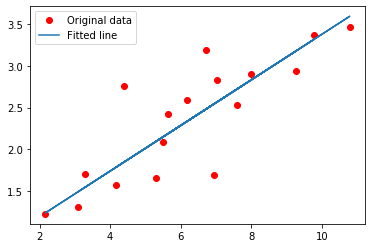

In [16]:
print("C=", mean_sqrt(linear_func, train_X, train_Y), "W=", W.numpy(), 'B=', b.numpy())

for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_func, train_X, train_Y))

    if (step+1) % display_step == 0 or step == 0:
        print(step+1, "C=", mean_sqrt(linear_func, train_X, train_Y), "W=", W.numpy(), 'B=', b.numpy())

plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W*train_X + b), label = 'Fitted line')

plt.legend()
plt.show()